In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## CSV Import

In [27]:
#loading data
path = 'data\JER_data_fixed.csv'
df = pd.read_csv(path)
df.head()

,BP (hPa),RH (%),TD (degC),TDmax (degC),TDmin (degC),WDmax (deg),Ws1mm (m/s),Ws10mm (m/s),STDwd (deg),Wx,Wy,max Wx,max Wy,Day sin,Day cos,Year sin,Year cos
0,NaN,NaN,17.3,17.4,17.3,97.0,2.4,1.7,9.8,-0.332659,1.565036,-0.582153,2.738813,-5.461913e-12,1.000000,-0.004731,0.999989
1,NaN,NaN,17.0,17.0,16.9,58.0,2.9,2.2,14.2,0.400699,2.061417,0.686912,3.533858,2.588190e-01,0.965926,-0.004014,0.999992
2,NaN,NaN,17.3,17.3,17.2,92.0,2.1,2.1,16.2,-0.118586,1.695859,-0.167416,2.394154,5.000000e-01,0.866025,-0.003297,0.999995
3,NaN,NaN,16.7,16.8,16.7,75.0,1.8,1.9,8.6,0.234652,1.481533,0.312869,1.975377,7.071068e-01,0.707107,-0.002580,0.999997
4,NaN,NaN,16.6,16.6,16.5,84.0,2.0,1.8,9.6,-0.094205,1.797533,-0.125606,2.396711,8.660254e-01,0.500000,-0.001864,0.999998


## Missing Data Handle

### Analysis 

In [28]:
print(np.isnan(df).sum())
print()
nan_indices = df[df['TD (degC)'].isna()].index
print(nan_indices)

BP (hPa)        49630
RH (%)          49886
TD (degC)         362
TDmax (degC)      357
TDmin (degC)      360
WDmax (deg)       261
Ws1mm (m/s)       470
Ws10mm (m/s)      462
STDwd (deg)       228
Wx                473
Wy                473
max Wx            471
max Wy            471
Day sin             0
Day cos             0
Year sin            0
Year cos            0
dtype: int64

Index([   569,   1810,   2674,   4783,   5767,   7473,   8674,   9004,   9224,
         9225,
       ...
       184474, 184475, 186513, 190377, 190378, 194066, 196034, 196035, 196036,
       208956],
      dtype='int64', length=362)


In [29]:
def nan_sequences(df):
    result = {}
    for column in df.columns:
        nan_indices = df[column].isna()
        sequences = []
        start_idx = None
        length = 0
        
        for i, is_nan in enumerate(nan_indices):
            if is_nan:
                if start_idx is None:
                    start_idx = i
                length += 1
            else:
                if start_idx is not None:
                    sequences.append((length, start_idx))
                    start_idx = None
                    length = 0
        
        # If the last element was NaN, we need to append the final sequence
        if start_idx is not None:
            sequences.append((length, start_idx))
        
        result[column] = sequences
    
    return result

In [30]:
def plot_tuples(tuples):
    # Unpack the data into two lists: x (second elements) and y (first elements)
    y, x = zip(*tuples)

    # Create a scatter plot
    plt.figure(figsize=(7, 4))
    plt.scatter(x, y, color='blue', alpha=0.5)

    # Set plot labels and title
    plt.xlabel('indices')
    plt.ylabel('sequences lengths')
    plt.title('Scatter Plot')

    # Display the plot
    plt.grid(True)
    plt.show()

In [31]:
def print_longest_nan_sequences(df, sequences, top_n=5):
    for column in df.columns:
        if column in sequences:
            longest_sequences = sorted(sequences[column], key=lambda x: x[0], reverse=True)[:top_n]
            print(f"Top {top_n} longest NaN sequences for '{column}':")
            for seq in longest_sequences:
                print(seq)
            print("-" * 70)  # Separator between columns
        else:
            print(f"No NaN sequences found in '{column}' column.")
            print("-" * 70)

In [32]:
sequences = nan_sequences(df)

for col in df.columns:
    print(f"'{col}':  {sequences[col]}")

'BP (hPa)':  [(49590, 0), (1, 52683), (3, 91723), (2, 100542), (3, 175706), (1, 175726), (6, 176232), (19, 176239), (1, 186849), (2, 190377), (1, 194066), (1, 196034)]
'RH (%)':  [(49589, 0), (1, 51700), (1, 52683), (2, 56110), (2, 58222), (1, 58864), (1, 58866), (1, 59154), (1, 63836), (2, 65516), (2, 68130), (2, 76128), (13, 82591), (1, 86907), (3, 91723), (1, 93623), (3, 94952), (2, 100542), (1, 102847), (2, 104451), (1, 107379), (1, 108102), (2, 112441), (3, 113630), (2, 117265), (1, 121588), (2, 124705), (3, 125566), (1, 125882), (77, 132309), (1, 143543), (1, 153376), (1, 161127), (1, 166664), (146, 172776), (2, 173882), (2, 184474), (1, 186513), (2, 190377), (1, 194066), (3, 196034), (1, 208956)]
'TD (degC)':  [(1, 569), (1, 1810), (1, 2674), (1, 4783), (1, 5767), (1, 7473), (1, 8674), (1, 9004), (2, 9224), (1, 9245), (1, 9331), (1, 10868), (1, 12548), (2, 13723), (35, 14263), (1, 15852), (1, 16518), (1, 17382), (1, 18389), (1, 19518), (1, 21102), (1, 22226), (1, 23055), (1, 247

In [33]:
print_longest_nan_sequences(df, sequences, top_n=8)

Top 8 longest NaN sequences for 'BP (hPa)':
(49590, 0)
(19, 176239)
(6, 176232)
(3, 91723)
(3, 175706)
(2, 100542)
(2, 190377)
(1, 52683)
----------------------------------------------------------------------
Top 8 longest NaN sequences for 'RH (%)':
(49589, 0)
(146, 172776)
(77, 132309)
(13, 82591)
(3, 91723)
(3, 94952)
(3, 113630)
(3, 125566)
----------------------------------------------------------------------
Top 8 longest NaN sequences for 'TD (degC)':
(146, 172776)
(77, 132309)
(35, 14263)
(3, 91723)
(3, 94952)
(3, 113630)
(3, 172728)
(3, 196034)
----------------------------------------------------------------------
Top 8 longest NaN sequences for 'TDmax (degC)':
(146, 172776)
(77, 132309)
(35, 14263)
(3, 91723)
(3, 94952)
(3, 113630)
(3, 172728)
(3, 196034)
----------------------------------------------------------------------
Top 8 longest NaN sequences for 'TDmin (degC)':
(146, 172776)
(77, 132309)
(35, 14263)
(3, 91723)
(3, 94952)
(3, 113630)
(3, 172728)
(3, 196034)
--------

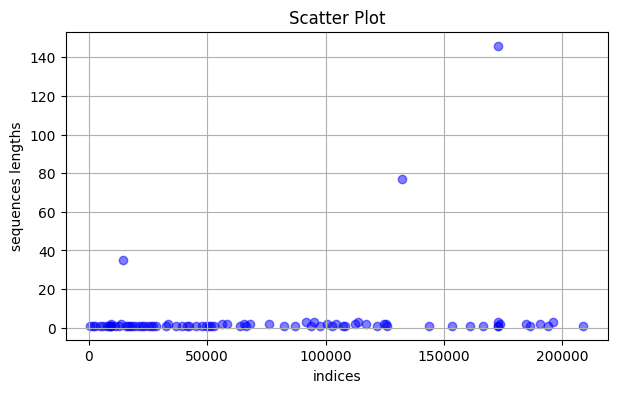

In [34]:
plot_tuples(sequences['TD (degC)'])

In [35]:
single_hole = [tup for tup in sequences['TD (degC)'] if tup[0] == 1]
print(f"amount of single holes: {len(single_hole)}")
print(single_hole)

amount of single holes: 55
[(1, 569), (1, 1810), (1, 2674), (1, 4783), (1, 5767), (1, 7473), (1, 8674), (1, 9004), (1, 9245), (1, 9331), (1, 10868), (1, 12548), (1, 15852), (1, 16518), (1, 17382), (1, 18389), (1, 19518), (1, 21102), (1, 22226), (1, 23055), (1, 24749), (1, 26205), (1, 27108), (1, 28210), (1, 32476), (1, 36700), (1, 39481), (1, 41453), (1, 42338), (1, 45026), (1, 47553), (1, 49587), (1, 50740), (1, 51700), (1, 52683), (1, 63836), (1, 66166), (1, 82591), (1, 86907), (1, 93623), (1, 97509), (1, 102847), (1, 107379), (1, 108102), (1, 121588), (1, 125882), (1, 143543), (1, 153376), (1, 161127), (1, 166664), (1, 172735), (1, 172755), (1, 186513), (1, 194066), (1, 208956)]


### Try to fill linear way only if it is a single hole in the middle of the same trend.

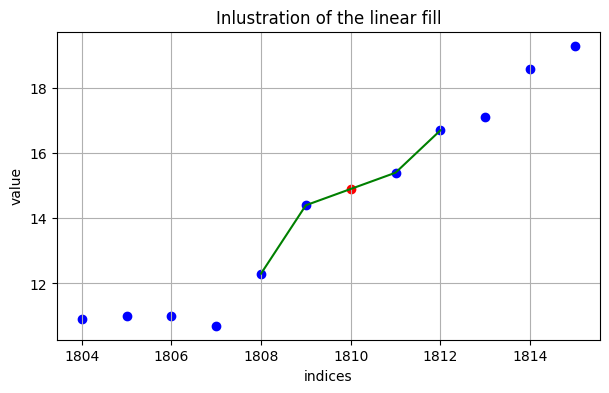

In [36]:
col = 'TD (degC)'
i = 1810

x = np.arange(i-6, i+6)
y = df[col][x]

# Create a scatter plot
plt.figure(figsize=(7, 4))
plt.scatter(x, y, color='blue')
avg = (df[col][i-1] + df[col][i+1]) /2
plt.scatter(i, avg, color='red')

# Extract the x and y values for i-2, i-1, i, i+1, and i+2
x_line = np.arange(i-2, i+2)
x_line = [i-2, i-1, i, i+1, i+2]
y_line = [df[col][i-2], df[col][i-1], avg, df[col][i+1], df[col][i+2]]

# Plot the line
plt.plot(x_line, y_line, color='green', linestyle='-')

# Set plot labels and title
plt.xlabel('indices')
plt.ylabel('value')
plt.title('Inlustration of the linear fill')

# Display the plot
plt.grid(True)
plt.show()

In [37]:
def fix_holes_linear(single_hole, col):
    count=0
    for tup in single_hole:
        ind = tup[1]
        if ind>=2 and ind<= len(df[col])-3:
            if (df[col][ind-2] <= df[col][ind-1] <= df[col][ind+1] <= df[col][ind+2]) or (df[col][ind-2] >= df[col][ind-1] >= df[col][ind+1] >= df[col][ind+2]):
                avg = (df[col][ind-1] + df[col][ind+1]) /2
                df.loc[ind, col] = avg
                count += 1
    print(f"successfully linearly filled {count} hols in the '{col}' colomn.")

In [38]:
print(len(single_hole))

55


In [39]:
print(np.isnan(df).sum())

BP (hPa)        49630
RH (%)          49886
TD (degC)         362
TDmax (degC)      357
TDmin (degC)      360
WDmax (deg)       261
Ws1mm (m/s)       470
Ws10mm (m/s)      462
STDwd (deg)       228
Wx                473
Wy                473
max Wx            471
max Wy            471
Day sin             0
Day cos             0
Year sin            0
Year cos            0
dtype: int64


In [40]:
fix_holes_linear(single_hole, 'TD (degC)')

successfully linearly filled 39 hols in the 'TD (degC)' colomn.


In [41]:
print(np.isnan(df).sum())

BP (hPa)        49630
RH (%)          49886
TD (degC)         323
TDmax (degC)      357
TDmin (degC)      360
WDmax (deg)       261
Ws1mm (m/s)       470
Ws10mm (m/s)      462
STDwd (deg)       228
Wx                473
Wy                473
max Wx            471
max Wy            471
Day sin             0
Day cos             0
Year sin            0
Year cos            0
dtype: int64


In [42]:
sequences = nan_sequences(df)
print(sequences['TD (degC)'])

[(1, 569), (2, 9224), (1, 9245), (1, 9331), (2, 13723), (35, 14263), (1, 17382), (1, 19518), (1, 28210), (2, 33579), (1, 36700), (1, 51700), (1, 52683), (2, 56110), (2, 58222), (2, 65516), (2, 68130), (2, 76128), (1, 86907), (3, 91723), (3, 94952), (2, 100542), (2, 104451), (1, 107379), (2, 112441), (3, 113630), (2, 117265), (2, 124705), (2, 125567), (1, 125882), (77, 132309), (1, 161127), (3, 172728), (1, 172755), (146, 172776), (2, 173882), (2, 184474), (1, 186513), (2, 190377), (3, 196034), (1, 208956)]


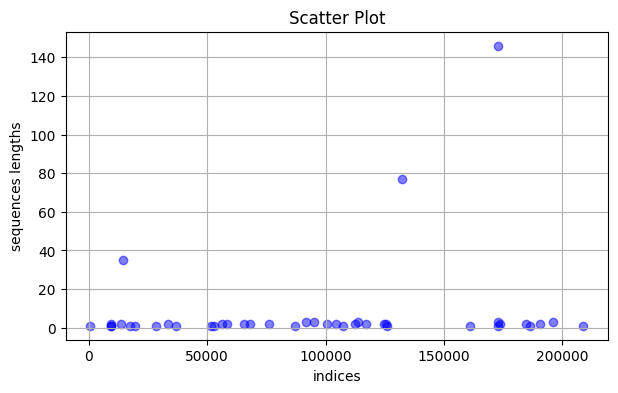

In [43]:
plot_tuples(sequences['TD (degC)'])

### Forward and Backward Fill Approach